<h1 style="color: #FF8C00;">Portfolio Analyst. Prueba Python.</h1>

---

La siguiente prueba consistirá en hacer una serie de cálculos y gráficos para analizar un conjunto de activos financieros.

Para ello deberás desarrollar el código necesario que permita realizar cada una de las tareas.


<h2 style="color: #FF6347;">Import de librerías a usar</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<h1 style="color: #FF8C00;">Ejercicio 1. Carga de datos y gráfico de precios.</h1>

En este primer ejercicio debes cargar el fichero que contiene los precios de los activos financieros a analizar. Este fichero se llama `financial_assets_prices.csv`.

Una vez cargados los precios de los activos, debes pintarlos en un gráfico temporal. Ten en cuenta que para que puedan ser comparados deben comenzar todas las series en el mismo valor.

<h2 style="color: #FF6347;">Carga de datos</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [2]:
data = pd.read_csv("data/financial_assets_prices.csv")
df = data.copy()
df_normalized = df.copy()

In [3]:
df.shape

(783, 6)

In [4]:
for column in df.columns[1:]:  # Ignora la columna 'date'
    df_normalized[column] = df[column] / df[column].iloc[0] #Normalizamos

In [5]:
for column in df_normalized.columns:
    df_normalized[column] = df_normalized[column].interpolate(method='linear', limit_direction='forward', axis=0)

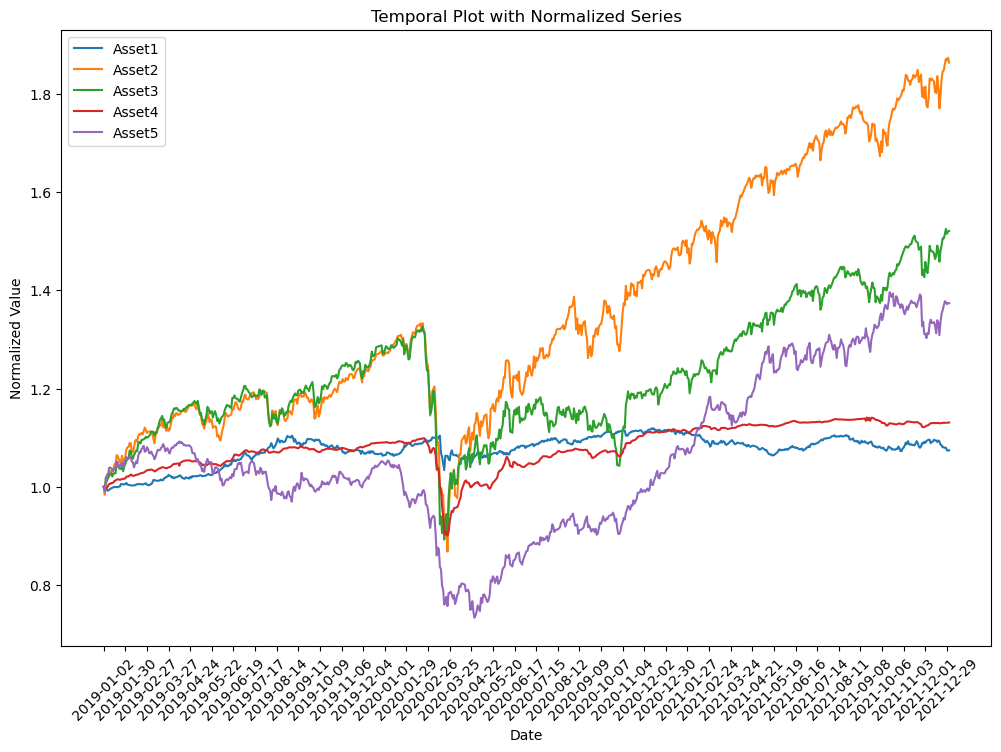

In [6]:
plt.figure(figsize=(12, 8))
for column in df_normalized.columns[1:]:
    plt.plot(df_normalized["date"], df_normalized[column], label=column)

plt.title('Temporal Plot with Normalized Series')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.xticks(df_normalized['date'][::20], rotation=45) 
plt.legend()
plt.show()


<h1 style="color: #FF8C00;">Ejercicio 2. Rendimientos diarios porcentuales.</h1>

En este segundo ejercicio debes calcular los rendimientos diarios porcentuales de cada uno de los activos y obtener la siguiente información de ellos:
- Calcular la matriz de correlaciones entre los 5 activos.
- Realizar un gráfico de dispersión entre los rendimientos de 2 activos.

In [7]:
df_dailyperformance = pd.DataFrame()

for column in df_normalized.columns[1:]:
    df_dailyperformance[column + "pct_change"] = df_normalized[column].pct_change()


In [8]:
df_dailyperformance

,Asset1pct_change,Asset2pct_change,Asset3pct_change,Asset4pct_change,Asset5pct_change
0,NaN,NaN,NaN,NaN,NaN
1,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,-0.002740,0.020954,0.025255,-0.001125,0.019242
3,-0.001512,0.012632,-0.007338,0.001856,0.014792
4,-0.001535,0.001003,0.007040,0.003605,-0.000192
...,...,...,...,...,...
778,-0.000913,0.007384,0.005439,0.000058,0.006677
779,0.000064,0.005483,0.007599,0.000058,-0.001141
780,-0.004862,-0.001588,-0.006647,0.000058,-0.003142
781,-0.000696,0.002903,0.003346,0.000263,0.001432


In [9]:
dates = df_normalized["date"].tolist()
df_dailyperformance["date"] = dates
new_order = ['date', 'Asset1pct_change', 'Asset2pct_change', 'Asset3pct_change', 'Asset4pct_change', 'Asset5pct_change']
df_dailyperformance = df_dailyperformance[new_order]
df_dailyperformance

,date,Asset1pct_change,Asset2pct_change,Asset3pct_change,Asset4pct_change,Asset5pct_change
0,2019-01-02,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242
3,2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792
4,2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192
...,...,...,...,...,...,...
778,2021-12-27,-0.000913,0.007384,0.005439,0.000058,0.006677
779,2021-12-28,0.000064,0.005483,0.007599,0.000058,-0.001141
780,2021-12-29,-0.004862,-0.001588,-0.006647,0.000058,-0.003142
781,2021-12-30,-0.000696,0.002903,0.003346,0.000263,0.001432


<h2 style="color: #FF6347;">Cálculo de rendimientos diarios.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [10]:
df_dailyperformance_heat = df_dailyperformance.drop(columns=["date"]).drop(df_dailyperformance.index[0])

In [11]:
df_dailyperformance_heat

,Asset1pct_change,Asset2pct_change,Asset3pct_change,Asset4pct_change,Asset5pct_change
1,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,-0.002740,0.020954,0.025255,-0.001125,0.019242
3,-0.001512,0.012632,-0.007338,0.001856,0.014792
4,-0.001535,0.001003,0.007040,0.003605,-0.000192
5,0.001976,0.012919,0.002272,0.004120,0.014003
...,...,...,...,...,...
778,-0.000913,0.007384,0.005439,0.000058,0.006677
779,0.000064,0.005483,0.007599,0.000058,-0.001141
780,-0.004862,-0.001588,-0.006647,0.000058,-0.003142
781,-0.000696,0.002903,0.003346,0.000263,0.001432


<h2 style="color: #FF6347;">Cálculo de la matriz de correlaciones.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [12]:
words_separated = {'Asset1pct_change': 'Ast 1 %daily change','Asset2pct_change': 'Ast 2 %daily change','Asset3pct_change': 'Ast 3 %daily change','Asset4pct_change': 'Ast 4 %daily change','Asset5pct_change': 'Ast 5 %daily change'}

df_dailyperformance_heat.columns = df_dailyperformance_heat.columns.map(words_separated)

In [13]:

df_dailyperformance_heat

,Ast 1 %daily change,Ast 2 %daily change,Ast 3 %daily change,Ast 4 %daily change,Ast 5 %daily change
1,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,-0.002740,0.020954,0.025255,-0.001125,0.019242
3,-0.001512,0.012632,-0.007338,0.001856,0.014792
4,-0.001535,0.001003,0.007040,0.003605,-0.000192
5,0.001976,0.012919,0.002272,0.004120,0.014003
...,...,...,...,...,...
778,-0.000913,0.007384,0.005439,0.000058,0.006677
779,0.000064,0.005483,0.007599,0.000058,-0.001141
780,-0.004862,-0.001588,-0.006647,0.000058,-0.003142
781,-0.000696,0.002903,0.003346,0.000263,0.001432


In [14]:
corr_matrix = df_dailyperformance_heat.corr()

In [15]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

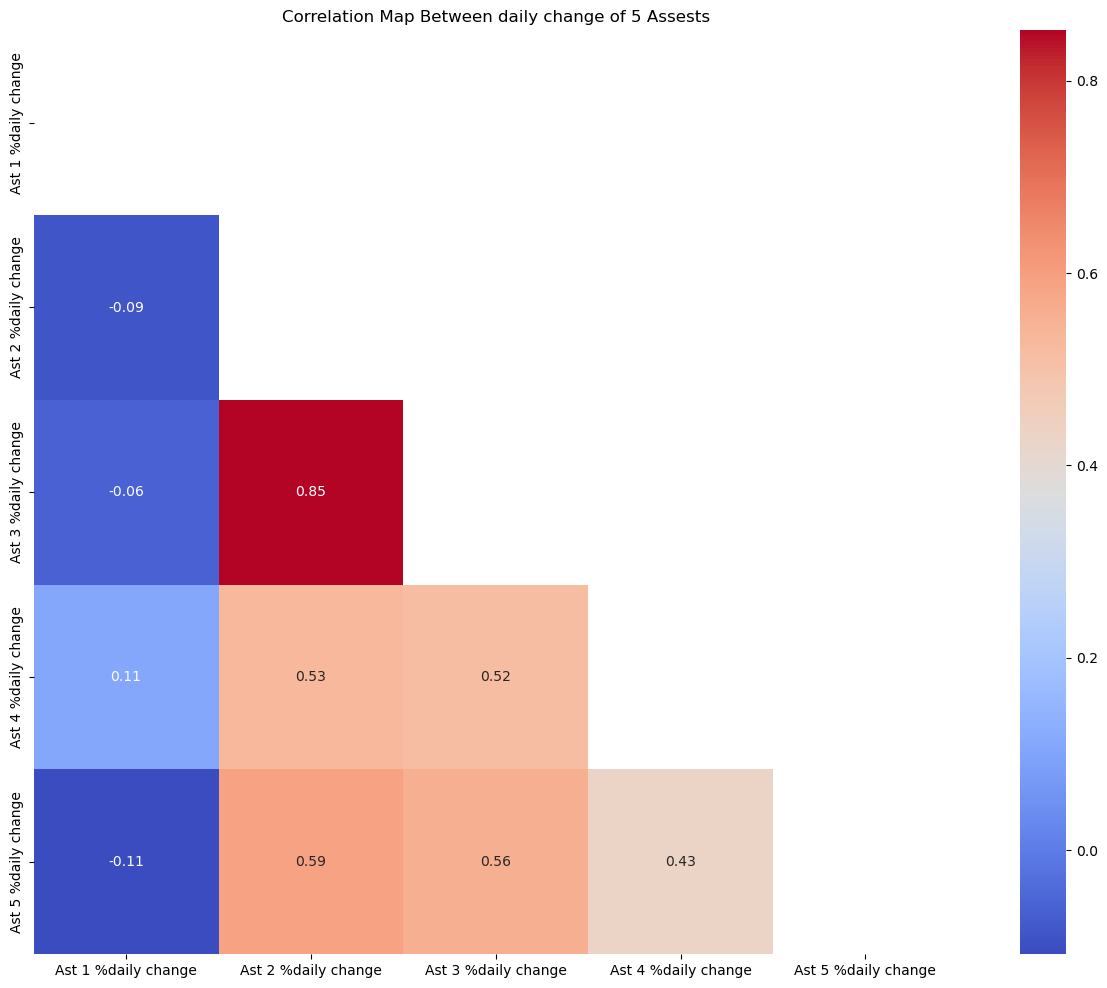

In [16]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, mask=mask)
plt.title('Correlation Map Between daily change of 5 Assests')
plt.show()

<h2 style="color: #FF6347;">Gráfico de dispersión entre los rendimientos de 2 activos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [17]:
df2and3 = pd.DataFrame([df_dailyperformance_heat["Ast 2 %daily change"],df_dailyperformance_heat["Ast 3 %daily change"]]).T

In [18]:
df2and3

,Ast 2 %daily change,Ast 3 %daily change
1,-0.016072,-0.005699
2,0.020954,0.025255
3,0.012632,-0.007338
4,0.001003,0.007040
5,0.012919,0.002272
...,...,...
778,0.007384,0.005439
779,0.005483,0.007599
780,-0.001588,-0.006647
781,0.002903,0.003346


In [19]:
cv_ast_2 = (np.std(df2and3["Ast 2 %daily change"]) / np.mean(df2and3["Ast 2 %daily change"]))
cv_ast_3 = (np.std(df2and3["Ast 3 %daily change"]) / np.mean(df2and3["Ast 3 %daily change"]))

In [20]:
print(f'Coefficient of variation fo Ast 2 is {cv_ast_2.round(2)} %')
print(f'Coefficient of variation fo Ast 3 is {cv_ast_3.round(2)} %')
print(f'Máx standart desviation of both assest is {df2and3.std().max()}')

Coefficient of variation fo Ast 2 is 13.76 %
Coefficient of variation fo Ast 3 is 19.23 %
Máx standart desviation of both assest is 0.011947337860672362


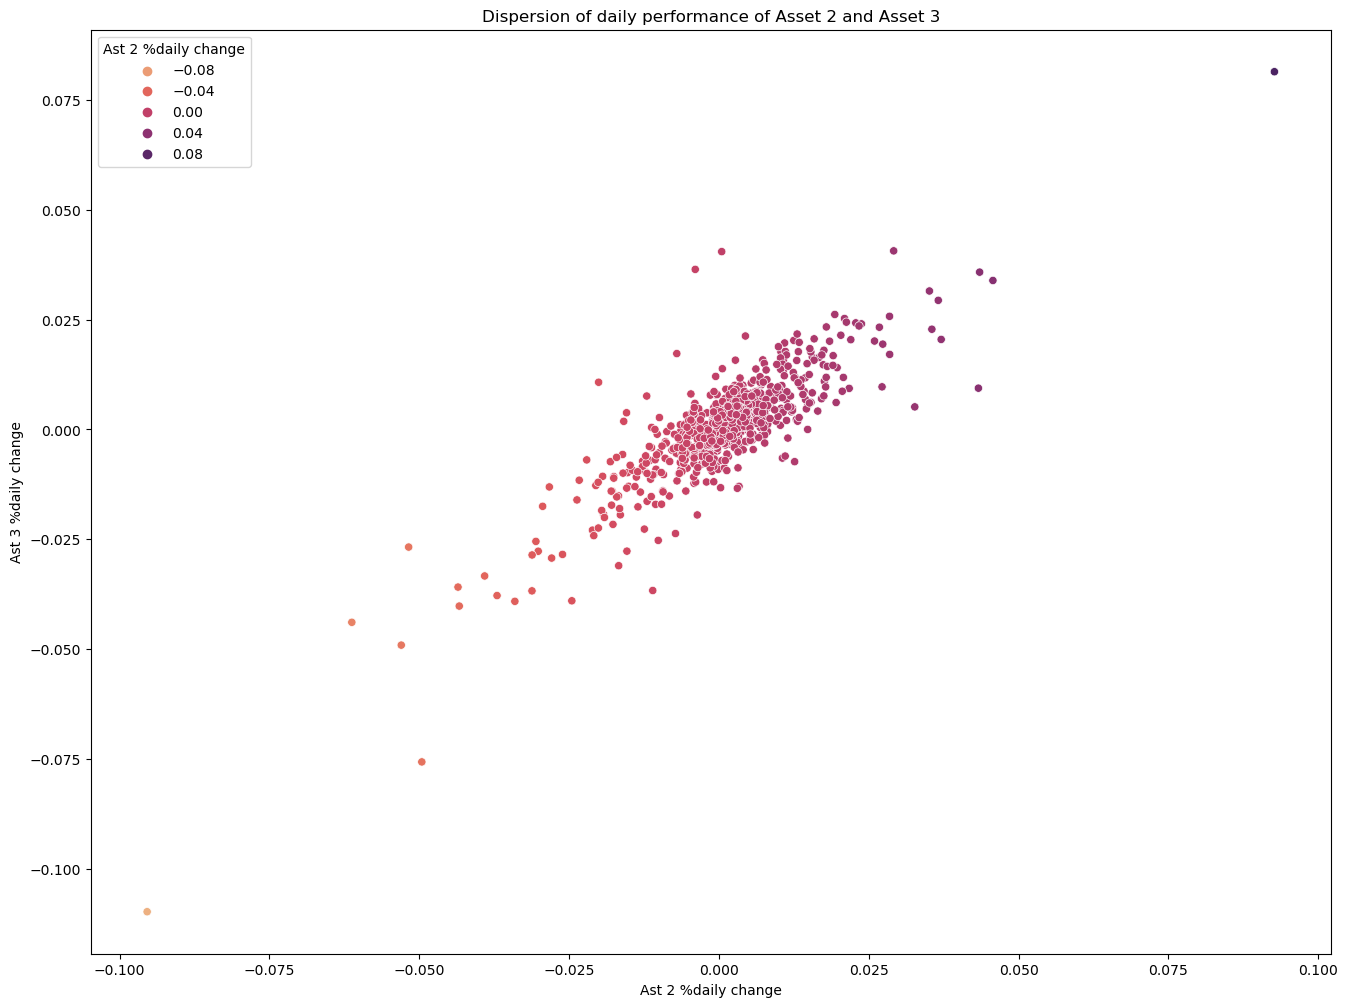

In [21]:
plt.figure(figsize=(16, 12))
sns.scatterplot(x='Ast 2 %daily change', y="Ast 3 %daily change", data=df2and3, palette="flare", hue='Ast 2 %daily change')
plt.title('Dispersion of daily performance of Asset 2 and Asset 3')
plt.xlabel('Ast 2 %daily change')
plt.ylabel('Ast 3 %daily change')
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 3. Análisis de una cartera</h1>

Este tercer ejercicio consiste en calcular y analizar los resultados de una cartera. Para ello será necesario cargar el fichero con los pesos que tiene cada uno de los activos en cada uno de los días. Este fichero se llama `portfolio_weights.csv`.

Para completar el ejercicio, será necesario calcular:
- Gráfico de área de los pesos.
- Gráfico de la rentabilidad histórica acumulada de la cartera.
- Rentabilidad anualizada de la cartera.
- Volatilidad anualizada de la cartera. (Puedes usar el factor de anualización de 261 días)

Extra: Gráfico de área de los pesos de los activos agrupándolos por familia. Esta información está contenida en el fichero `financial_assets_information.csv`.

<h2 style="color: #FF6347;">Gráfico de área de los pesos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [22]:
data = pd.read_csv("data/portfolio_weights.csv")

df2 = data.copy()

In [23]:
df2.shape

(783, 6)

In [24]:
df2.head(3)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974


In [25]:
df2['date'] = pd.to_datetime(df2['date'])
df2.set_index('date', inplace=True)
color_map = ['#440154', '#3B528B', '#21908C', '#5DC963', '#FDE725']

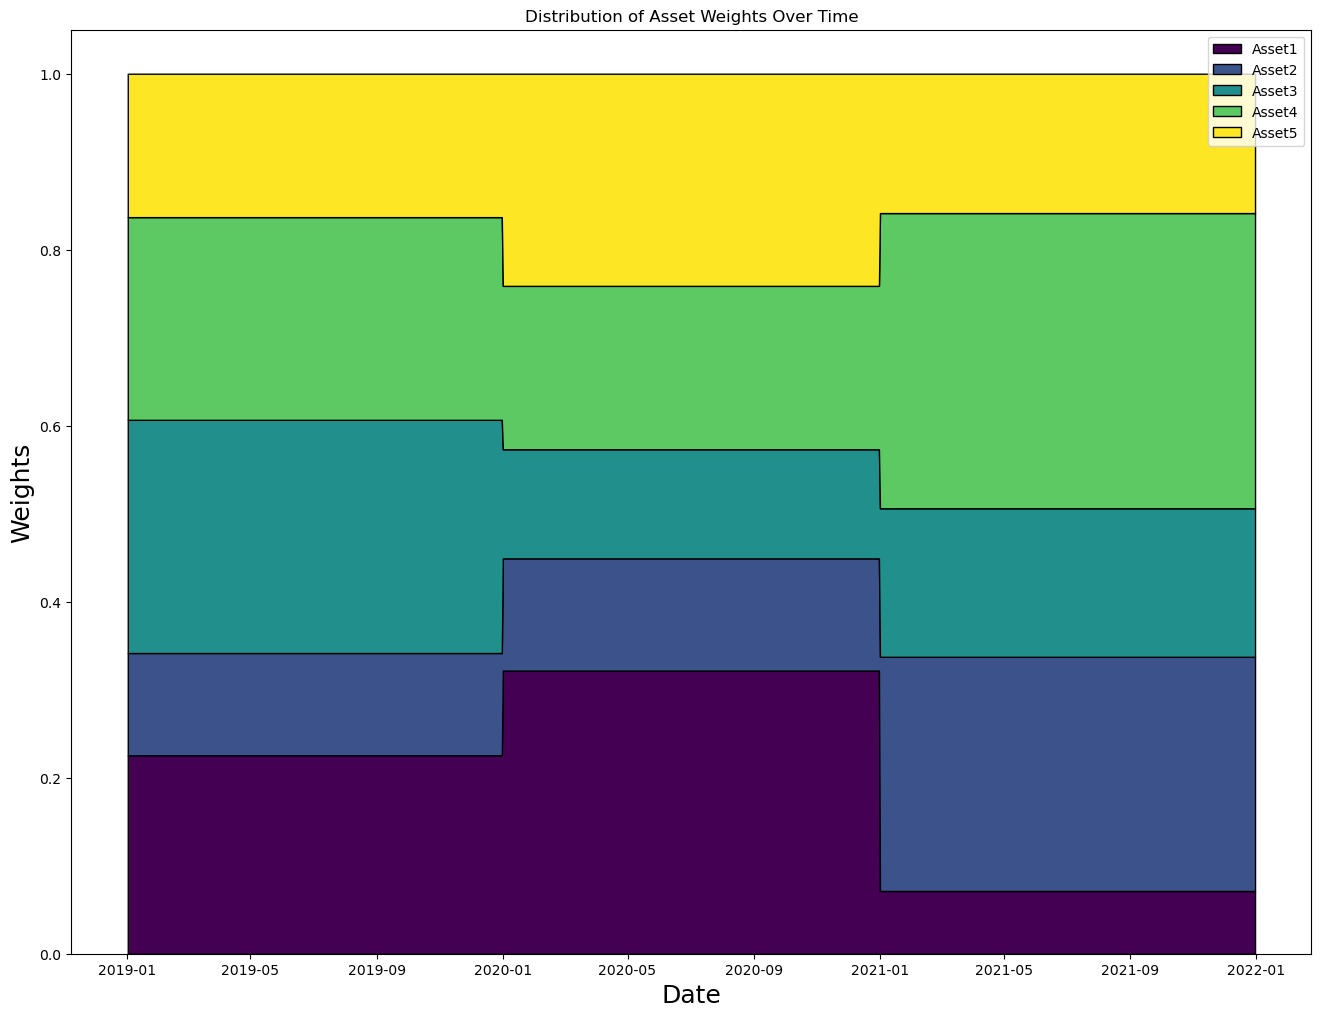

In [26]:
plt.figure(figsize=(16, 12))
plt.stackplot(df2.index, df2.values.T, labels=df2.columns, edgecolor="black", colors = color_map)
plt.title('Distribution of Asset Weights Over Time')
plt.xlabel('Date', size = '18')
plt.ylabel('Weights', size = '18')
plt.legend(loc='upper right')
plt.show()

<h2 style="color: #FF6347;">Gráfico de la rentabilidad histórica acumulada de la cartera.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [27]:
date = df_dailyperformance["date"]

In [28]:
#df_dailyperformance = df_dailyperformance.drop(0, axis=0)

In [29]:
df_dailyperformance_nodate = df_dailyperformance.drop("date", axis=1)

In [30]:
for column in df_dailyperformance_nodate.columns:
    for index in df_dailyperformance_nodate.index:
        df_dailyperformance_nodate.at[index, column] += 1


In [31]:
df_dailyperformance_nodate

,Asset1pct_change,Asset2pct_change,Asset3pct_change,Asset4pct_change,Asset5pct_change
0,NaN,NaN,NaN,NaN,NaN
1,0.997968,0.983928,0.994301,0.997293,0.990568
2,0.997260,1.020954,1.025255,0.998875,1.019242
3,0.998488,1.012632,0.992662,1.001856,1.014792
4,0.998465,1.001003,1.007040,1.003605,0.999808
...,...,...,...,...,...
778,0.999087,1.007384,1.005439,1.000058,1.006677
779,1.000064,1.005483,1.007599,1.000058,0.998859
780,0.995138,0.998412,0.993353,1.000058,0.996858
781,0.999304,1.002903,1.003346,1.000263,1.001432


In [32]:
dfcumulative_returns = df_dailyperformance_nodate.cumprod()

In [33]:
dfcumulative_returns.insert(0,"date", date)

In [34]:
dfcumulative_returns

,date,Asset1pct_change,Asset2pct_change,Asset3pct_change,Asset4pct_change,Asset5pct_change
0,2019-01-02,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,0.997968,0.983928,0.994301,0.997293,0.990568
2,2019-01-04,0.995233,1.004546,1.019412,0.996171,1.009629
3,2019-01-07,0.993729,1.017235,1.011932,0.998019,1.024563
4,2019-01-08,0.992204,1.018255,1.019056,1.001618,1.024366
...,...,...,...,...,...,...
778,2021-12-27,1.079543,1.860510,1.513496,1.130360,1.377677
779,2021-12-28,1.079612,1.870711,1.524997,1.130426,1.376105
780,2021-12-29,1.074363,1.867740,1.514861,1.130492,1.371782
781,2021-12-30,1.073615,1.873163,1.519929,1.130789,1.373747


In [35]:
dfcumulative_returns['date'] = pd.to_datetime(dfcumulative_returns['date'])
dfcumulative_returns.set_index('date', inplace=True)

In [36]:
words_assets = {'Asset1pct_change': 'Asset 1 History','Asset2pct_change': 'Asset 2 History','Asset3pct_change': 'Asset 3 History','Asset4pct_change': 'Asset 4 History','Asset5pct_change': 'Asset 5 History'}

dfcumulative_returns.columns = dfcumulative_returns.columns.map(words_assets)

In [37]:
dfcumulative_returns.index[0]

Timestamp('2019-01-02 00:00:00')

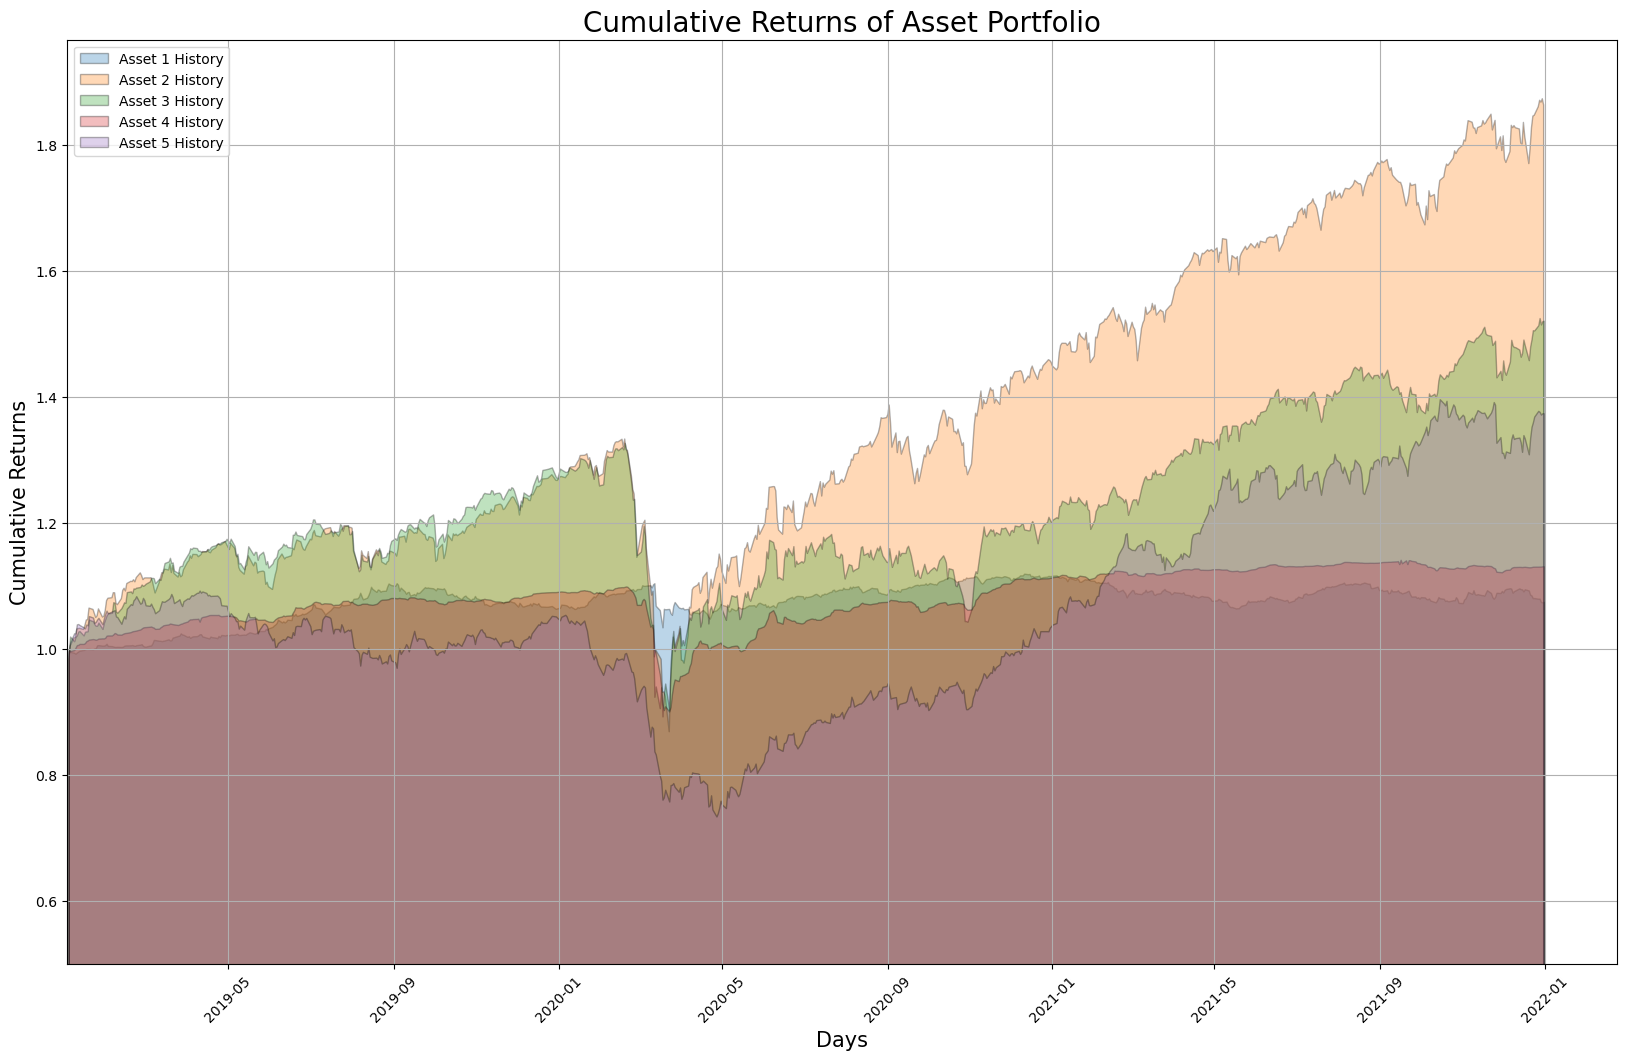

In [48]:
plt.figure(figsize=(20, 12))
for column in dfcumulative_returns.columns:
    plt.fill_between(dfcumulative_returns.index, dfcumulative_returns[column], alpha=0.3, label=column, edgecolor="black")
plt.title('Cumulative Returns of Asset Portfolio', size="20")
plt.xlabel('Days',size="15")
plt.xticks(rotation=45)
plt.xlim(dfcumulative_returns.index[0],None)
plt.ylabel('Cumulative Returns', size="15")
plt.ylim(0.5, None)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

<h2 style="color: #FF6347;">Rentabilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [39]:
df_dailyperformance2 = df_dailyperformance.set_index("date")
df_dailyperformance2.index = pd.to_datetime(df_dailyperformance2.index)

In [40]:
dfannual_performance = (1 + df_dailyperformance2).resample('Y').prod() - 1

In [41]:
dfannual_performance.columns = ["Asset 1 Annuality","Asset 2 Annuality","Asset 3 Annuality","Asset 4 Annuality","Asset 5 Annuality"]


In [42]:
for column in dfannual_performance.columns:
    for index in dfannual_performance.index:
        dfannual_performance.at[index, column] * 100

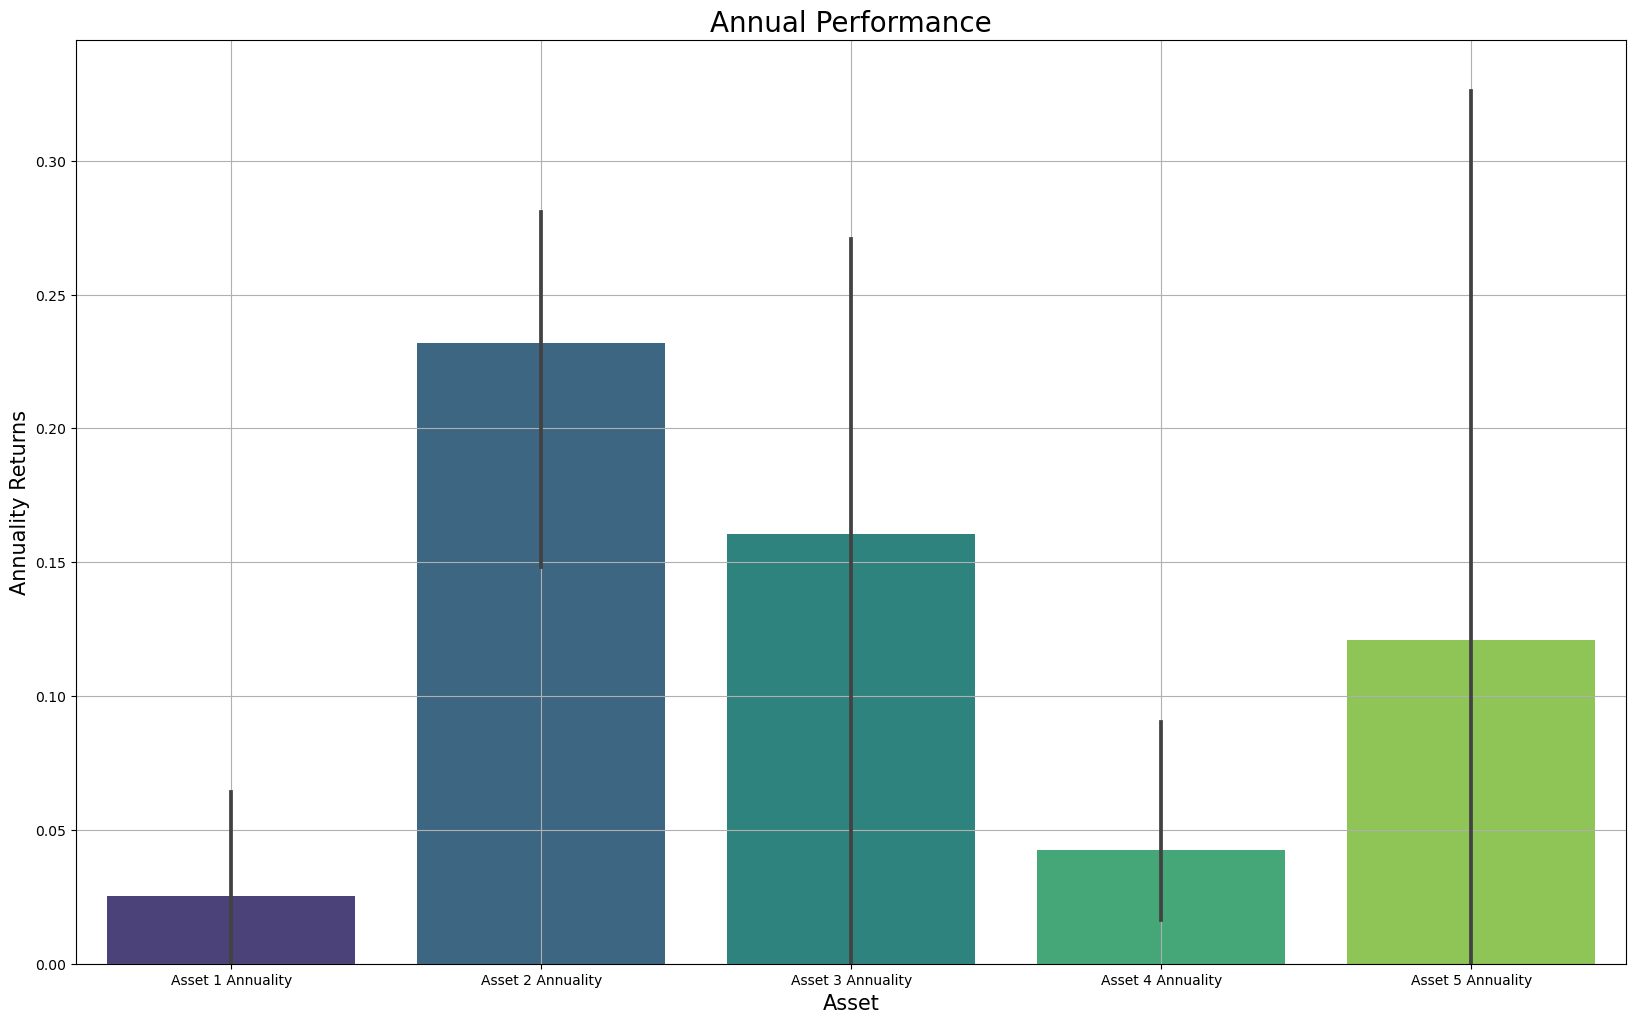

In [43]:
plt.figure(figsize=(20, 12))
sns.barplot(data=dfannual_performance,palette="viridis", estimator="mean", errorbar=('ci', 95))
plt.title('Annual Performance', size="20")
plt.xlabel('Asset',size="15")
plt.ylim(0, None)
plt.ylabel('Annuality Returns', size="15")
plt.grid(True)
plt.show()

<h2 style="color: #FF6347;">Volatilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [44]:
volatility_daily = df_dailyperformance2.std()

In [45]:
days=len(df_dailyperformance2)

volatility_annual = volatility_daily * np.sqrt(days)

dfvolatility_annual=pd.DataFrame(volatility_annual).T

dfvolatility_annual.columns = ["Asset 1","Asset 2","Asset 3","Asset 4","Asset 5"]

dfvolatility_annual

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5
0,0.083551,0.334312,0.325569,0.091091,0.262812


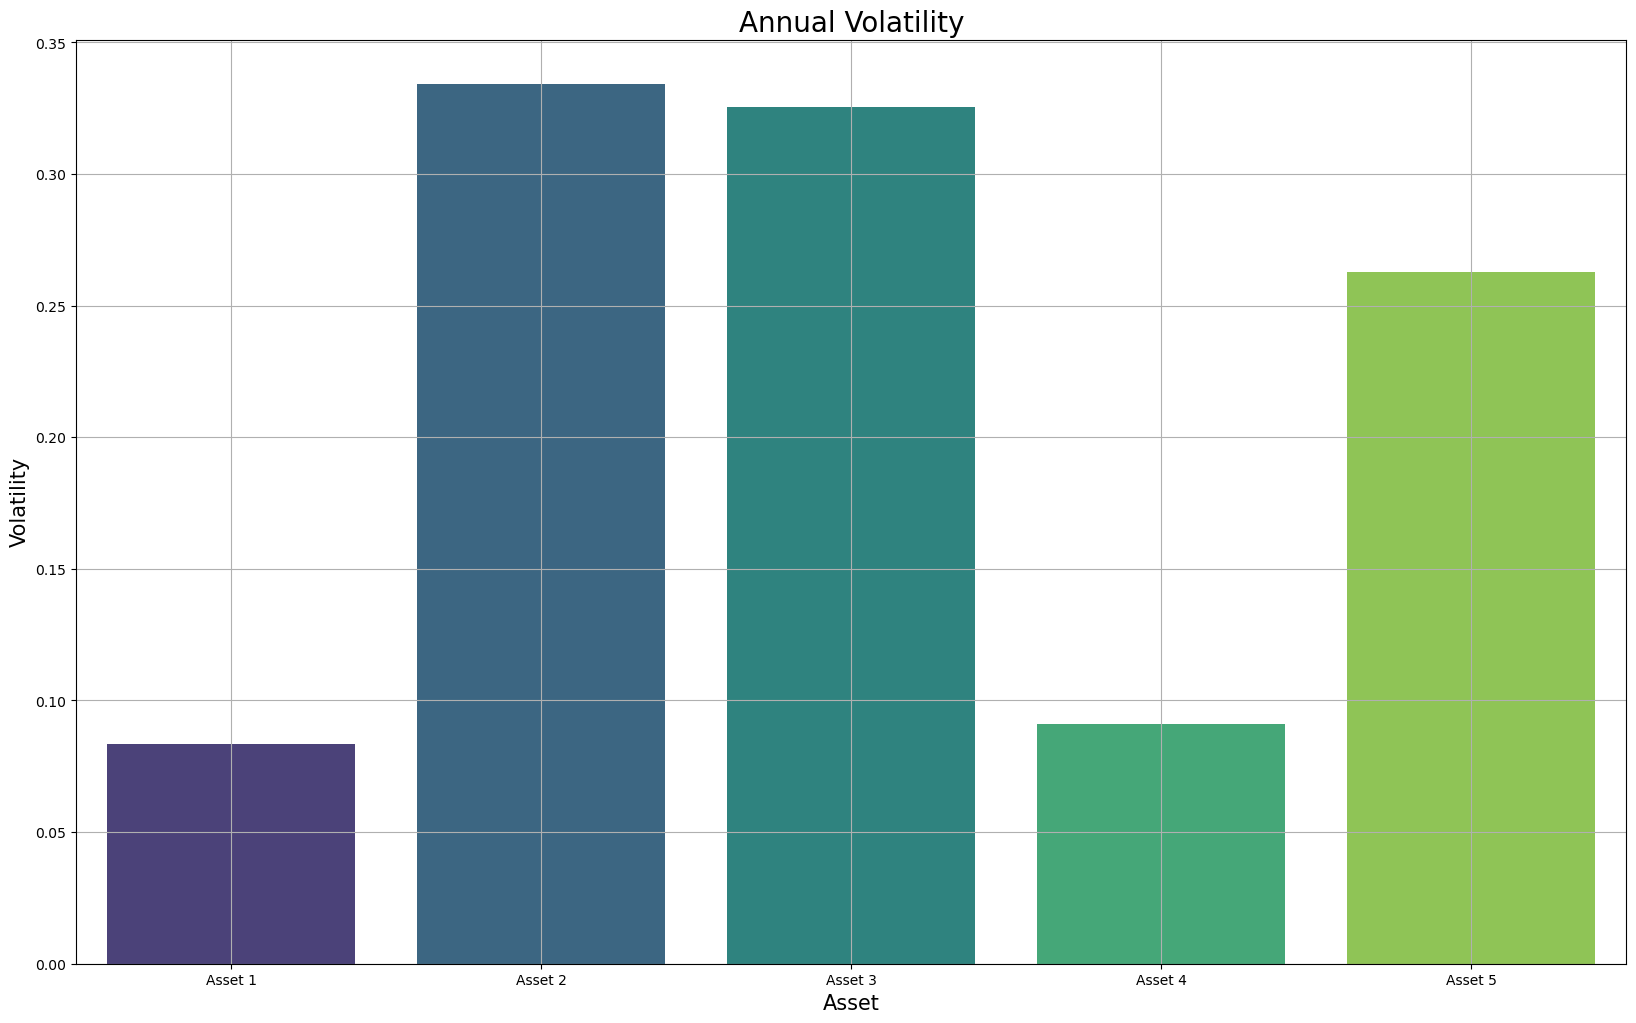

In [46]:
plt.figure(figsize=(20, 12))
sns.barplot(data=dfvolatility_annual,palette="viridis", estimator="mean", errorbar=('ci', 95))
plt.title('Annual Volatility', size="20")
plt.xlabel('Asset',size="15")
plt.ylim(0, None)
plt.ylabel('Volatility', size="15")
plt.grid(True)
plt.show()

<h2 style="color: #FF6347;">Extra. Gráfico de área de los pesos de los activos agrupándolos por familia.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>